In [487]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
import seaborn as sns

# 1. Data Preparation

In [488]:
# Read data from csv
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [489]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [490]:
df = df.dropna()

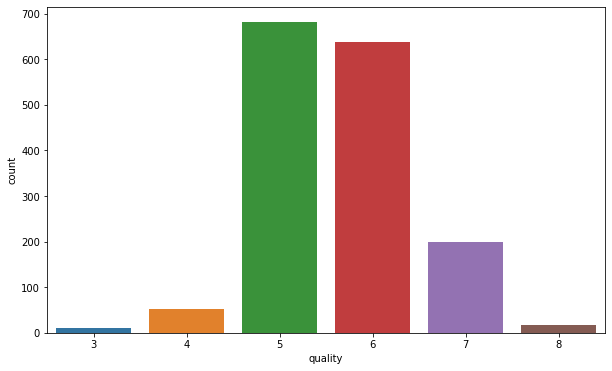

In [491]:
fig = plt.figure(figsize = (10,6))
sns.countplot(df['quality'])

In [492]:
# The original dataset has 6 distint class for quality, we will bin the quality label into 3 groups: 0,1 and 2. We will use these

df.loc[(df['quality'] <= 4), 'quality'] = 1
df.loc[(df['quality'] == 5), 'quality'] = 2
df.loc[(df['quality'] == 6), 'quality'] = 2
df.loc[ df['quality'] >= 7, 'quality'] = 3


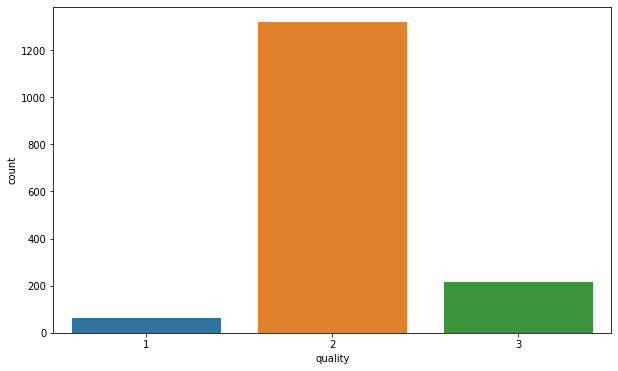

In [493]:
fig = plt.figure(figsize = (10,6))
sns.countplot(df['quality'])

In [494]:
df['quality'].value_counts()

2    1319
3     217
1      63
Name: quality, dtype: int64

In [495]:
df_3 = df[df['quality'] == 3]
df_3 = df_3.sample(n = 217,random_state = 42)
df_2 = df[df['quality'] == 2]
df_2 = df_2.sample(n = 217,random_state = 42)
df_1 = df[df['quality'] == 1]
df_1 = pd.concat([df_1]*4)
#df_1.head()

In [496]:
df_unbiased = pd.concat([df_1,df_2,df_3])

In [497]:
df_unbiased = df_unbiased.reset_index(drop = True)

In [498]:
df_unbiased['quality'].value_counts()

1    252
3    217
2    217
Name: quality, dtype: int64

In [499]:
# Do normalisation
scaler = StandardScaler()
scaled = scaler.fit_transform(df_unbiased.values)
scaled_normalized = normalize(scaled) 
df_processed = pd.DataFrame(scaled_normalized,index=df_unbiased.index,columns=df_unbiased.columns)

In [500]:
df_processed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.189829,0.043405,-0.315174,0.396131,-0.011766,-0.290440,-0.107932,0.165725,0.111531,-0.303199,-0.542223,-0.428770
1,-0.348350,0.570510,-0.190692,-0.171302,0.353928,-0.161415,-0.148994,-0.315448,0.243890,-0.218861,-0.178208,-0.274403
2,0.134484,0.098541,0.083488,0.039378,0.001803,0.171204,0.137461,0.269312,-0.208146,-0.373813,-0.583903,-0.564748
3,-0.399409,-0.034344,-0.100524,-0.067282,-0.114565,-0.110475,0.176365,-0.314459,0.660592,-0.096459,0.417925,-0.221348
4,-0.002839,0.232696,-0.007160,-0.171444,-0.032756,-0.130676,0.088003,0.268967,-0.060133,-0.322317,-0.626526,-0.564025


# 2. Models training

# 2.1 Train and evaluate DBScan

# To esitmate the best eps to be used for analysis, we deployed the K-distance plot to estimate the optimal eps to input.

In [501]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(df_processed.iloc[:,:-1].values)
distances, indices = nbrs.kneighbors(df_processed.iloc[:,:-1].values)

In [502]:
# Compute the mean distance of the K number of neighbouring points from each point 
dist_mean =np.zeros(distances.shape[0])
i=0
for item in distances:
    dist_mean[i] = item.mean()
    i +=1

sorted_dist_mean = np.sort(dist_mean) 

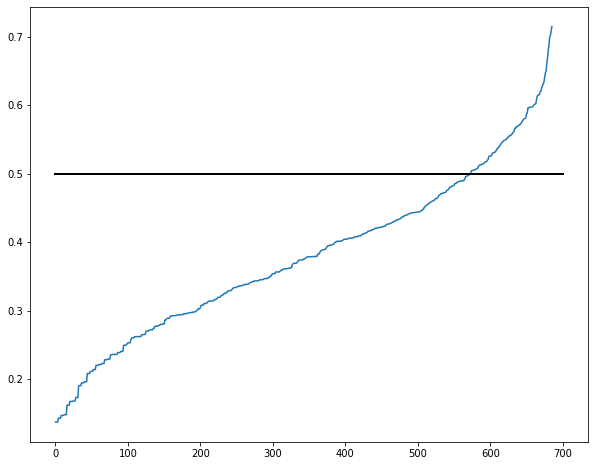

In [503]:
plt.figure(figsize=(10,8))
plt.plot(sorted_dist_mean)
plt.plot([0, 700], [0.5, 0.5], 'k-', lw=2)

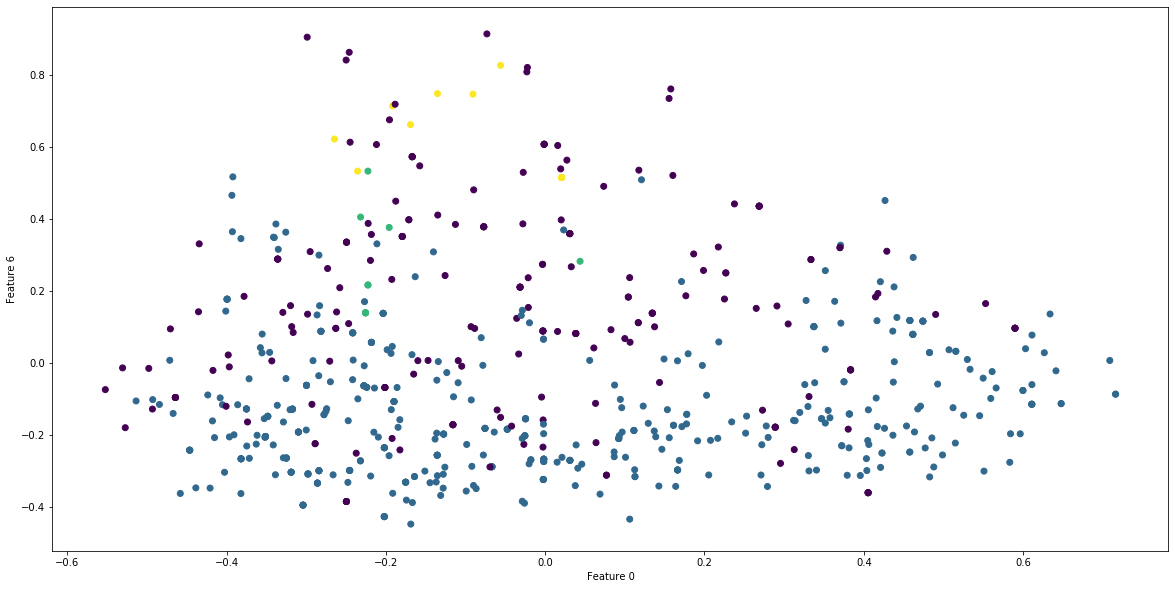

In [559]:
dbscan = DBSCAN(eps=0.55, min_samples =10 )
clusters = dbscan.fit_predict(df_processed.iloc[:,:-1])
# plot the cluster assignments
plt.figure(figsize=(20,10))
plt.scatter(df_processed.iloc[:, 0], df_processed.iloc[:, 6], c=clusters,)
plt.xlabel("Feature 0")
plt.ylabel("Feature 6")

plt.show()

In [560]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 3
Number of noise sample = 210


In [561]:
df_clusters = pd.DataFrame(clusters,columns=['Class'])

In [562]:
df_clusters['Class'].value_counts()

 0    455
-1    210
 2     11
 1     10
Name: Class, dtype: int64

In [563]:
y_DBS_col = np.reshape(clusters, (-1,1))
y_DBS_df = pd.DataFrame(y_DBS_col, columns=['DBS_clusters'])
y_DBS_df['quality'] = df_unbiased['quality']

In [564]:
y_DBS_df

,DBS_clusters,quality
0,0,1
1,0,1
2,-1,1
3,0,1
4,-1,1
...,...,...
681,-1,3
682,0,3
683,0,3
684,0,3


In [565]:
pred_gp1 = y_DBS_df.loc[y_DBS_df['quality']== 1,'DBS_clusters']
pred_gp2 = y_DBS_df.loc[y_DBS_df['quality']== 2,'DBS_clusters']
pred_gp3 = y_DBS_df.loc[y_DBS_df['quality']== 3,'DBS_clusters']

In [566]:
p1_cats = pred_gp1.value_counts()
p1_max = p1_cats.max()
p1_accuracy = p1_max / p1_cats.sum()
p1_accuracy

0.6507936507936508

In [567]:
p2_cats = pred_gp2.value_counts()
p2_max = p2_cats.max()
p2_accuracy = p2_max / p2_cats.sum()
p2_accuracy

0.5207373271889401

In [568]:
p3_cats = pred_gp3.value_counts()
p3_max = p3_cats.max()
p3_accuracy = p3_max / p3_cats.sum()
p3_accuracy

0.8202764976958525

In [570]:
p1_cats

 0    164
-1     80
 1      4
 2      4
Name: DBS_clusters, dtype: int64

In [571]:
p2_cats

 0    113
-1     93
 2      7
 1      4
Name: DBS_clusters, dtype: int64

In [572]:
p3_cats

 0    178
-1     37
 1      2
Name: DBS_clusters, dtype: int64

# 2.2 Train and evaluate K mean Clustering model

In [517]:
x=df_processed.iloc[:,:-1].values
km=KMeans(n_clusters=3,random_state=0)
km.fit(x)
y_kmeans=km.fit_predict(x)

In [518]:
y=df_unbiased['quality']
y_kmeans=np.reshape(y_kmeans,(-1,1))
df_target=pd.DataFrame(y,columns=['quality'])
df_target['cluster']=y_kmeans

In [519]:
df_target

,quality,cluster
0,1,0
1,1,0
2,1,2
3,1,1
4,1,0
...,...,...
681,3,1
682,3,2
683,3,0
684,3,1


In [520]:
df_target.sort_values(by="quality" , ascending=True)
df_target['quality'].value_counts()

1    252
3    217
2    217
Name: quality, dtype: int64

In [521]:
pred_gp1=df_target.iloc[0:252,1]
pred_gp2=df_target.iloc[252:469,1]
pred_gp3=df_target.iloc[469:,1]

In [522]:
p1_cats = pred_gp1.value_counts()
p1_max = p1_cats.max()
p1_accuracy = p1_max / p1_cats.sum()
p1_accuracy

0.6507936507936508

In [523]:
p1_cats 

0    164
2     68
1     20
Name: cluster, dtype: int64

In [524]:
p2_cats = pred_gp2.value_counts()
p2_max = p2_cats.max()
p2_accuracy = p2_max / p2_cats.sum()
p2_accuracy

0.4009216589861751

In [525]:
p2_cats

2    87
0    86
1    44
Name: cluster, dtype: int64

In [526]:
p3_cats = pred_gp3.value_counts()
p3_max = p3_cats.max()
p3_accuracy = p3_max / p3_cats.sum()
p3_accuracy

0.5207373271889401

In [527]:
p3_cats

1    113
2     81
0     23
Name: cluster, dtype: int64

# Apply PCA to the model

In [528]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(df_processed.iloc[:,:-1])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6'])
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-0.384671,-0.469382,-0.192646,0.079439,0.140394,0.499468
1,-0.727590,-0.106669,-0.139590,-0.007215,-0.089530,-0.251048
2,0.123310,-0.686314,0.207191,-0.102351,-0.189409,0.239065
3,-0.520206,0.640530,0.127999,0.157471,0.106778,0.122545
4,-0.135981,-0.719844,0.006738,-0.181826,-0.040999,0.103609


In [529]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

[0.30429753 0.20323942 0.15514573 0.09169874 0.06238217 0.05548301]
0.8722466012121504


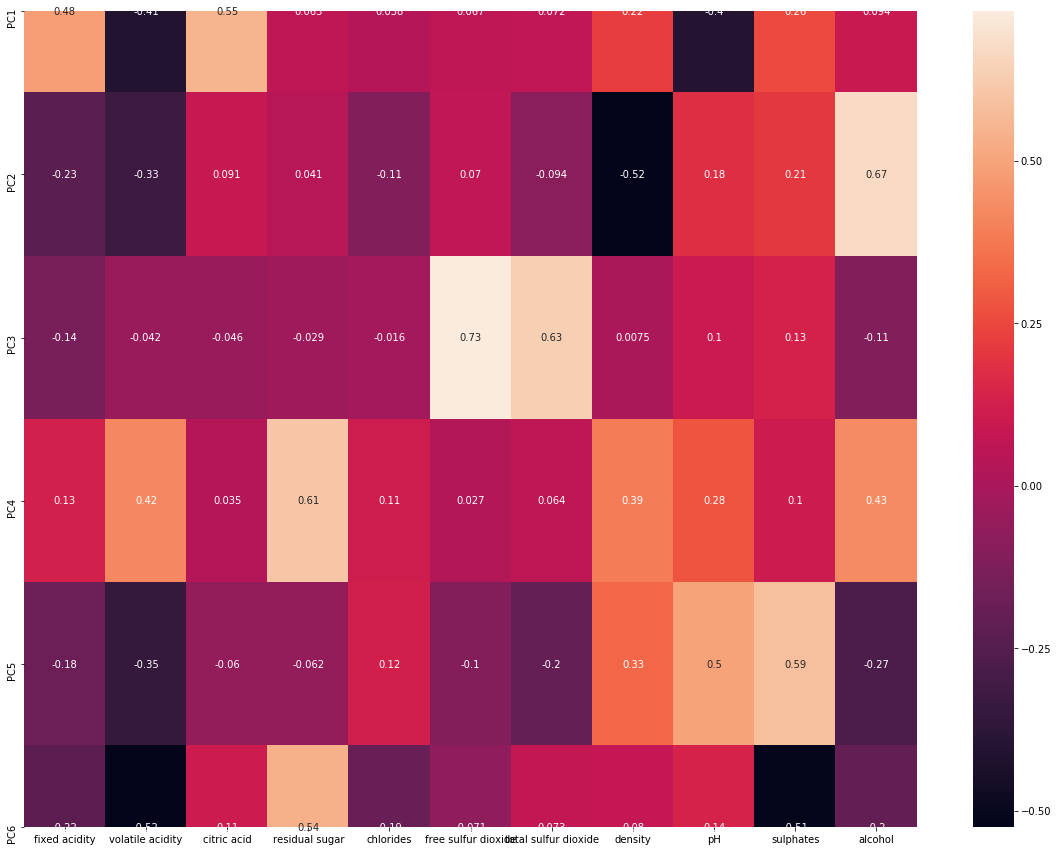

In [530]:
W = pca.components_


fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(W, annot=True, ax=ax)
ax.set_yticklabels(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
ax.set_xticklabels(df_processed.iloc[:,:-1].columns)
plt.show()

In [531]:
principalDf = pd.concat([principalDf,df_unbiased[['quality']]], axis = 1)


In [532]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,quality
0,-0.384671,-0.469382,-0.192646,0.079439,0.140394,0.499468,1
1,-0.727590,-0.106669,-0.139590,-0.007215,-0.089530,-0.251048,1
2,0.123310,-0.686314,0.207191,-0.102351,-0.189409,0.239065,1
3,-0.520206,0.640530,0.127999,0.157471,0.106778,0.122545,1
4,-0.135981,-0.719844,0.006738,-0.181826,-0.040999,0.103609,1


# Run DBScan model with new dataset

In [533]:
neigh_PCA = NearestNeighbors(n_neighbors=12)
nbrs_PCA = neigh.fit(principalDf.iloc[:,:-1].values)
distances, indices = nbrs_PCA.kneighbors(principalDf.iloc[:,:-1].values)

In [534]:
dist_mean =np.zeros(distances.shape[0])
i=0
for item in distances:
    dist_mean[i] = item.mean()
    i +=1

sorted_dist_mean = np.sort(dist_mean) 

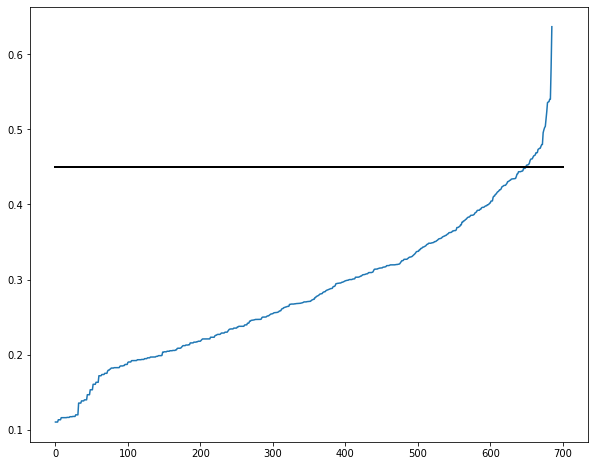

In [535]:
plt.figure(figsize=(10,8))
plt.plot(sorted_dist_mean)
plt.plot([0, 700], [0.45, 0.45], 'k-', lw=2)

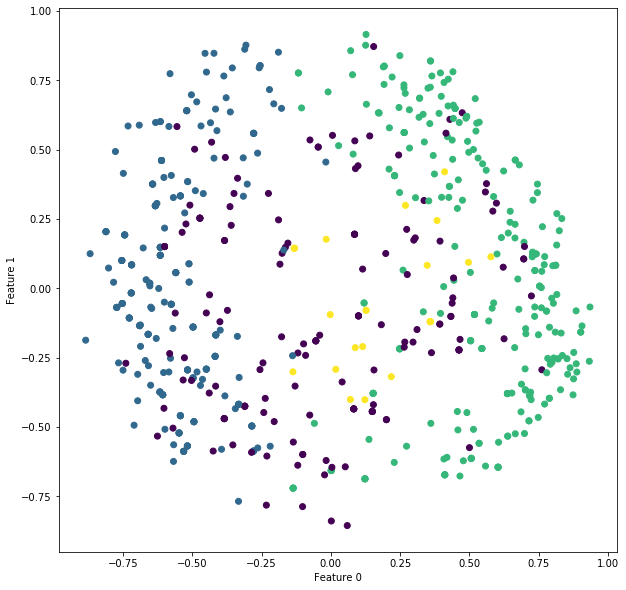

In [536]:
dbscan_PCA = DBSCAN(eps=0.435, min_samples = 12)
clusters_PCA = dbscan_PCA.fit_predict(principalDf.iloc[:,:-1])
# plot the cluster assignments
plt.figure(figsize=(10,10))
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=clusters_PCA,)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.show()

In [537]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters_PCA)) - (1 if -1 in clusters_PCA else 0)
n_noise_ = list(clusters_PCA).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 3
Number of noise sample = 154


In [538]:
df_clusters_PCA = pd.DataFrame(clusters_PCA,columns=['Class'])
df_clusters_PCA['Class'].value_counts()

 1    265
 0    242
-1    154
 2     25
Name: Class, dtype: int64

In [539]:
y_DBS_col = np.reshape(clusters_PCA, (-1,1))
y_DBS_df = pd.DataFrame(y_DBS_col, columns=['DBS_clusters'])
y_DBS_df['quality'] = principalDf['quality']

In [540]:
y_DBS_df

,DBS_clusters,quality
0,-1,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
681,2,3
682,1,3
683,0,3
684,1,3


In [541]:
pred_gp1 = y_DBS_df.loc[y_DBS_df['quality']== 1,'DBS_clusters']
pred_gp2 = y_DBS_df.loc[y_DBS_df['quality']== 2,'DBS_clusters']
pred_gp3 = y_DBS_df.loc[y_DBS_df['quality']== 3,'DBS_clusters']

In [542]:
p1_cats = pred_gp1.value_counts()
p1_max = p1_cats.max()
p1_accuracy = p1_max / p1_cats.sum()
p1_accuracy

0.5873015873015873

In [543]:
p2_cats = pred_gp2.value_counts()
p2_max = p2_cats.max()
p2_accuracy = p2_max / p2_cats.sum()
p2_accuracy

0.391705069124424

In [544]:
p3_cats = pred_gp3.value_counts()
p3_max = p3_cats.max()
p3_accuracy = p3_max / p3_cats.sum()
p3_accuracy

0.6589861751152074

In [545]:
p1_cats

 0    148
 1     56
-1     40
 2      8
Name: DBS_clusters, dtype: int64

In [546]:
p2_cats

-1    85
 1    66
 0    56
 2    10
Name: DBS_clusters, dtype: int64

In [547]:
p3_cats

 1    143
 0     38
-1     29
 2      7
Name: DBS_clusters, dtype: int64

# Run K-mean clustering with new dataset

In [548]:
x=principalDf.iloc[:,:-1].values
km2=KMeans(n_clusters=3,random_state=0)
km2.fit(x)
y_km2=km2.fit_predict(x)

In [549]:
y=principalDf['quality']
y_km2=np.reshape(y_km2,(-1,1))
df_target=pd.DataFrame(y,columns=['quality'])
df_target['cluster']=y_km2

In [550]:
df_target

,quality,cluster
0,1,1
1,1,1
2,1,2
3,1,0
4,1,1
...,...,...
681,3,0
682,3,2
683,3,1
684,3,0


In [551]:
df_target.sort_values(by="quality" , ascending=True)
df_target['quality'].value_counts()

1    252
3    217
2    217
Name: quality, dtype: int64

In [552]:
pred_gp1=df_target.iloc[0:252,1]
pred_gp2=df_target.iloc[252:469,1]
pred_gp3=df_target.iloc[469:,1]

In [553]:
p1_cats = pred_gp1.value_counts()
p1_max = p1_cats.max()
p1_accuracy = p1_max / p1_cats.sum()
p1_accuracy

0.6507936507936508

In [554]:
p1_cats

1    164
2     68
0     20
Name: cluster, dtype: int64

In [555]:
p2_cats = pred_gp2.value_counts()
p2_max = p2_cats.max()
p2_accuracy = p2_max / p2_cats.sum()
p2_accuracy

0.4055299539170507

In [556]:
p2_cats

2    88
1    85
0    44
Name: cluster, dtype: int64

In [557]:
p3_cats = pred_gp3.value_counts()
p3_max = p3_cats.max()
p3_accuracy = p3_max / p3_cats.sum()
p3_accuracy

0.5207373271889401

In [558]:
p3_cats

0    113
2     80
1     24
Name: cluster, dtype: int64